In [5]:
import seaborn as sns
sns.set_style("whitegrid")


<IPython.core.display.Javascript object>


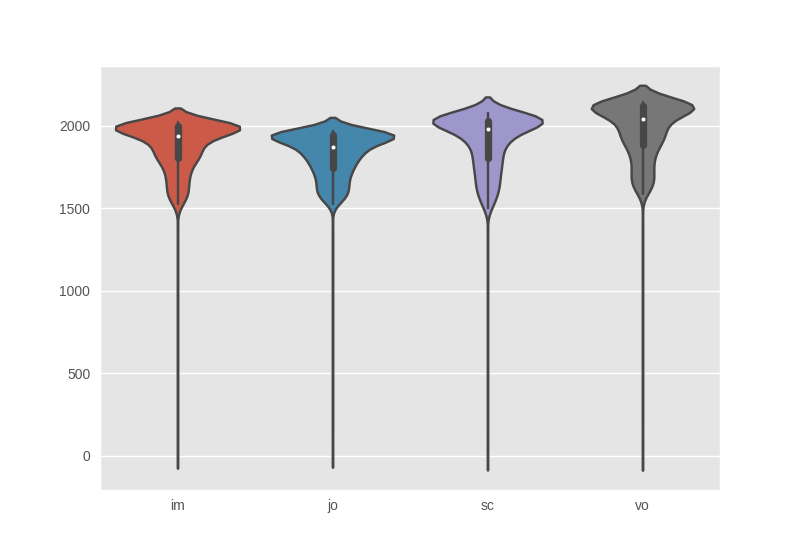

In [21]:
fig,ax = plt.subplots()

genres = pd.DataFrame()
genres['im'] = numpy.mean(qomim,axis=0)
genres['jo'] = numpy.mean(qomjo,axis=0)
genres['sc'] = numpy.mean(qomsc,axis=0)
genres['vo'] = numpy.mean(qomvo,axis=0)
ax = sns.violinplot(x=genres)

In [7]:
procs = pd.DataFrame()
procs['norm'] = numpy.mean(qomnorm,axis = 0)
procs['syn'] = numpy.mean(qomsyn,axis = 0)
ax1 = sns.boxplot(x = procs)

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


In [8]:
strats = pd.DataFrame()
strats['s1'] = numpy.mean(qoms1,axis=0)
strats['s2'] = numpy.mean(qoms2,axis=0)
strats['s3'] = numpy.mean(qoms3,axis=0)
strats['s4'] = numpy.mean(qoms4,axis=0)
strats['s5'] = numpy.mean(qoms5,axis=0)
strats['s6'] = numpy.mean(qoms6,axis=0)
ax2 = sns.boxplot(x=strats)

In [9]:
melodies = pd.DataFrame()
for i in range(1,33,1):
    melodies['mel'+str(i)] = numpy.mean(eval('m'+str(i)),axis=0)
    
ax3 = sns.boxplot(x = melodies)

In [2]:
%run dataext.py
%matplotlib notebook

In [10]:
h1, h2, h3, h4, h5,h6 =([] for i in range(6))
for i in range(1,7,1):
    s = 's'+str(i)
    h = 'h'+str(i)
    for j in range(len(eval(s))):
        eval(h).append(handdist(eval(s)[j]))
        
        

In [11]:
hdf = pd.DataFrame()
hdf['h1'] = numpy.mean(h1,axis=0)
hdf['h2'] = numpy.mean(h2,axis=0)
hdf['h3'] = numpy.mean(h3,axis=0)
hdf['h4'] = numpy.mean(h4,axis=0)
hdf['h5'] = numpy.mean(h5,axis=0)
hdf['h6'] = numpy.mean(h6,axis=0)
ax7=sns.boxplot(x=hdf)

<IPython.core.display.Javascript object>


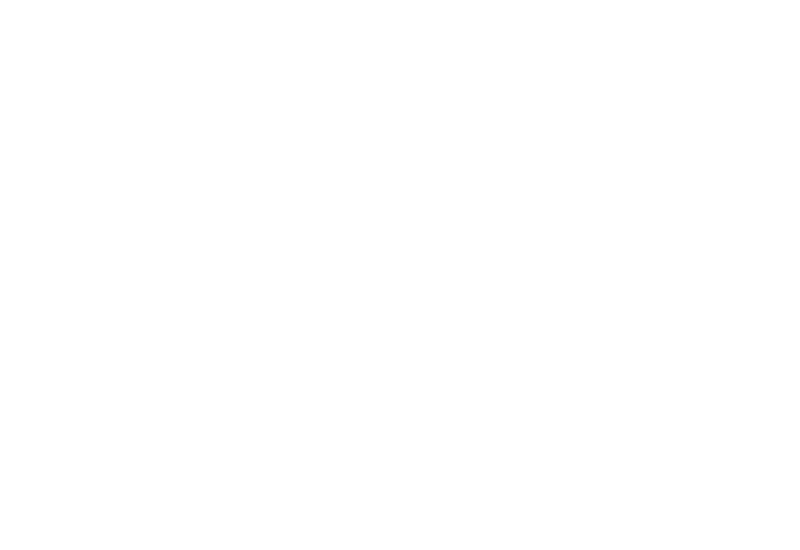

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


stri = '1_1_4'

x = pd.DataFrame.as_matrix(getlhrh(stri)['lh'])[:,0]
y = pd.DataFrame.as_matrix(getlhrh(stri)['lh'])[:,1]
z = pd.DataFrame.as_matrix(getlhrh(stri)['lh'])[:,2]

x1 = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])[:,0]
y2 = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])[:,1]
z3 = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])[:,2]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x,y,z)
ax.plot(x1,y2,z3)

In [13]:
men =dataset[dataset['sex']=='M']
women = dataset[dataset['sex']=='F']


for key in men['key']:
    plt.plot(men['handdist'][key])
for key in women['key']:
    plt.plot(women['handdist'][key])
    

NameError: name 'dataset' is not defined

In [14]:
displayaxes = []
for i in range(len(participant)):
    displayaxes.append(displyax(tracings[i]))


NameError: name 'participant' is not defined

In [15]:
%run funcs.py


key,handstrat,participant,melody,sex,age,score,genre,proc,qommax,qommin,qomav,handdistmax,handdistmin,handdistav,zmax,zmin,distlh,distrh = ([] for i in range(19))
cols=['key','handstrat','participant','melody','sex','age','score','genre','proc','qommax','qommin','qomav','handdistmax','handdistmin','handdistav','zmax','zmin','distlh','distrh']


for i in range(len(tracings)):
    key.append(i)
    handstrat.append(int(returnDetails(tracings[i])['typeID']))
    partic = int(returnDetails(tracings[i])['partID'])
    participant.append(partic)
    melID = int(returnDetails(tracings[i])['melID'])
    melody.append(melID)
    sex.append(list(participants.loc[participants.index[partic],['sex']])[0])
    age.append(int(participants.loc[participants.index[partic],['age']]))
    score.append(int(participants.loc[participants.index[partic],['scoreMus']]))
    if int(melID) in im:
        genre.append('im')
    elif int(melID) in jo:
        genre.append('jo')
    elif int(melID) in sc:
        genre.append('sc')
    elif int(melID) in vo:
        genre.append('vo')
    if int(melID) <=16:
        proc.append('norm')
    elif int(melID) >=16:
        proc.append('syn')
    qommax.append(max(qom(tracings[i])))
    qommin.append(min(qom(tracings[i])))
    qomav.append(numpy.mean(qom(tracings[i])))
    handdistmax.append(max(handdist(tracings[i])))
    handdistmin.append(min(handdist(tracings[i])))
    handdistav.append(numpy.mean(handdist(tracings[i])))
    zmax.append(maxminz(tracings[i])['zmax'])
    zmin.append(maxminz(tracings[i])['zmin'])
    distlh.append(displrh(tracings[i])['distlh'])
    distrh.append(displrh(tracings[i])['distrh'])

for i in range(len(key)):
    avdataset = pd.DataFrame(zip(key,handstrat,participant,melody,sex,age,score,genre,proc,qommax,qommin,qomav,handdistmax,handdistmin,handdistav,zmax,zmin,distlh,distrh))
    avdataset.columns=cols


NameError: name 'tracings' is not defined

In [16]:
%run funcs.py


key,handstrat,participant,melody,sex,age,score,genre,proc,qom,vel,lhx,lhy,lhz,rhx,rhy,rhz,handdist,  = ([] for i in range(19))
cols=['key','handstrat','participant','melody','sex','age','score','genre','proc',]


for i in range(len(tracings)):
    key.append(i)
    handstrat.append(int(returnDetails(tracings[i])['typeID']))
    partic = int(returnDetails(tracings[i])['partID'])
    participant.append(partic)
    melID = int(returnDetails(tracings[i])['melID'])
    melody.append(melID)
    sex.append(list(participants.loc[participants.index[partic],['sex']])[0])
    age.append(int(participants.loc[participants.index[partic],['age']]))
    score.append(int(participants.loc[participants.index[partic],['scoreMus']]))
    if int(melID) in im:
        genre.append('im')
    elif int(melID) in jo:
        genre.append('jo')
    elif int(melID) in sc:
        genre.append('sc')
    elif int(melID) in vo:
        genre.append('vo')
    if int(melID) <=16:
        proc.append('norm')
    elif int(melID) >=16:
        proc.append('syn')
    qoms.append(qomnew(tracings[i]))
    handdists.append(handdist(tracings[i]))
    rz.append(readfile(tracings[i])['RHZ'])
    lz.append(readfile(tracings[i])['LHZ'])

        
    
for i in range(len(key)):
    datacontset = pd.DataFrame(zip())

ValueError: too many values to unpack

In [17]:
knnset = pd.DataFrame.as_matrix(avdataset.iloc[:,9:])
knnset
plotset = avdataset.iloc[:,4:]
smallset = avdataset.iloc[:,9:]
mels = avdataset['melody']
avdataset.to_csv('/home/tejaswik/Documents/CurrentProjects/melmot/avdata.csv')

NameError: name 'avdataset' is not defined

In [18]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=15, algorithm='ball_tree').fit(knnset)
distances, indices = nbrs.kneighbors(knnset)
nei = nbrs.kneighbors_graph(knnset).toarray()
plt.imshow(nei)

NameError: name 'knnset' is not defined

In [19]:
readfile(stri)

,id,frame,time,RHX,RHY,RHZ,LHX,LHY,LHZ
0,0,9571.000000,159.500000,630.124000,-415.100000,1193.319000,372.320000,585.945000,1095.833000
1,1,9543.800025,159.046668,665.119409,-438.716718,1237.507331,375.006761,627.089193,1124.322651
2,2,9550.909418,159.165160,656.981187,-433.934778,1229.939776,375.223644,619.092860,1120.554495
3,3,9572.626052,159.527104,630.490479,-417.031322,1200.295231,374.391636,590.132511,1103.016915
4,4,9586.888414,159.764809,613.407413,-406.286176,1181.937446,374.089862,571.826803,1092.511637
5,5,9584.493495,159.724891,617.294541,-409.338892,1188.811538,374.967202,577.383996,1097.742381
6,6,9572.246418,159.520770,633.554429,-420.549036,1210.612349,376.533654,597.054445,1112.294491
7,7,9563.505197,159.375082,645.353686,-428.828911,1227.087563,377.847220,611.679526,1123.545181
8,8,9565.615998,159.410264,643.457173,-428.076441,1227.093787,378.403100,610.718479,1124.540037
9,9,9574.870451,159.564508,632.569160,-421.373134,1216.262822,378.473801,599.489991,1118.774602


In [714]:
stri = '1_1_4'
vels = numpy.diff(readfile(stri).iloc[:,3:],axis = 1)
# acc = numpy.diff(vels)
plt.plot(vels)
plt.plot(readfile(stri)[['RHZ']])
# plt.plot(acc)

IOError: [Errno 2] No such file or directory: '/usr/lib/python2.7/dist-packages/matplotlib/backends/web_backend/mpl.js'

In [712]:
# set1 = pd.DataFrame(avdataset[['qomav','handdistav','zmax','zmin']])
# sns.pairplot(set1)